In [2]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import shutil
from scipy import stats
from scipy.stats import chi2_contingency

In [13]:
df = pd.read_csv('/Volumes/Cingulate/Fred/CSV/Site.csv')
df['Site'] = df['Site'].str[7:] #remove first 7 characters in that column

In [19]:
print(len(np.unique(df['Site'])))
print(np.unique(df['Site']))

18
['Ancona' 'Budapest' 'Freiburg' 'Heemstede' 'Heeze' 'Krakow' 'Lisboa'
 'London' 'Lublin' 'Munchen' 'Pecs' 'Porto' 'Tampere' 'Tyumen' 'Tübingen'
 'Uppsala' 'Wien' 'Zwolle']


/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_77353/3859332636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values,palette='crest')


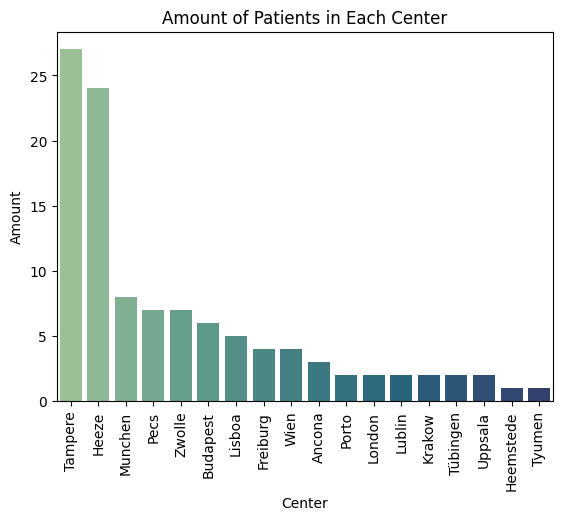

In [28]:
value_counts = df['Site'].value_counts()

sns.barplot(x=value_counts.index, y=value_counts.values,palette='crest')
plt.xlabel('Center')
plt.ylabel('Amount')
plt.title('Amount of Patients in Each Center')

plt.xticks(rotation=90)
plt.show()

In [2]:
def copy_nii_files(source_dir, destination_dir):
    # Traverse the source directory and subdirectories
    for root, dirs, files in os.walk(source_dir):
        # Filter for .nii files
        for file in files:
            if file.endswith('.nii'):
                subject_id = file[:12]  # Extract the first 12 characters as subject ID
                
                # Define the destination subfolder path based on the subject ID
                destination_subfolder = os.path.join(destination_dir, subject_id)
                
                # Create the destination subfolder if it does not exist
                if not os.path.exists(destination_subfolder):
                    os.makedirs(destination_subfolder)
                
                # Copy the .nii file to the destination subfolder
                source_file_path = os.path.join(root, file)
                destination_file_path = os.path.join(destination_subfolder, file)
                
                # Avoid overwriting if the file already exists
                if not os.path.exists(destination_file_path):
                    shutil.copy(source_file_path, destination_file_path)
                    print(f'Copied {file} to {destination_subfolder}')
                else:
                    print(f'File {file} already exists in {destination_subfolder}')

# Usage example:
source_dir = '/Users/jp1590/Partners HealthCare Dropbox/Julianna Pijar/Rao_UCSF_RNShippocampus/BIDS_UCSF/derivatives/nii'
destination_dir = '/Volumes/OneTouch/UCSF/NII'  # This is the new destination
copy_nii_files(source_dir, destination_dir)

Copied sub-UCSF0014_ses-postopct_bone_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0014
Copied sub-UCSF0014_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0014
Copied sub-UCSF0014_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0014
Copied sub-UCSF0014_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0014
Copied sub-UCSF0013_ses-postopct_bone_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0013
Copied sub-UCSF0013_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0013
Copied sub-UCSF0013_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0013
Copied sub-UCSF0013_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0013
Copied sub-UCSF0022_ses-postopct_soft-tissue_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0022
Copied sub-UCSF0022_ses-postopct_soft-tissue_CT_2.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0022
Copied sub-UCSF0022_ses-postopct_soft-tissue_CT_1.nii to /Volumes/On

Copied sub-UCSF0052_ses-postmri2_FLAIRa.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-postmri2_acq-precontrast_T1wa.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-postmri2_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-postmri2_ce-gadolinium_T1wa.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-postmri2_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-postmri2_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-preopmri_acq-precontrast_T1w_real.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-preopmri_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0052_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0052
Copied sub-UCSF0064_ses-postopct_soft-tissue_CT.nii to /

Copied sub-UCSF0038_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0038
Copied sub-UCSF0038_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0038
Copied sub-UCSF0038_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0038
Copied sub-UCSF0031_ses-postopct_bone_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0031
Copied sub-UCSF0031_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0031
Copied sub-UCSF0031_ses-preopmri_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0031
Copied sub-UCSF0031_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0031
Copied sub-UCSF0031_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0031
Copied sub-UCSF0036_ses-postopct_soft-tissue_CT_2.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0036
Copied sub-UCSF0036_ses-postopct_soft-tissue_CT_1.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0036
Copied sub-UCSF0036_ses-postopct_soft-tissue_CT.nii to /Volumes/OneT

Copied sub-UCSF0011_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0011
Copied sub-UCSF0011_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0011
Copied sub-UCSF0033_ses-postopct_CT_1.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0033_ses-postopct_soft-tissue_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0033_ses-preopmri_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0033_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0033_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0033_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0033
Copied sub-UCSF0034_ses-postopct_soft-tissue_CT.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0034
Copied sub-UCSF0034_ses-preopmri_T2w_i00012.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0034
Copied sub-UCSF0034_ses-preopmri_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF003

Copied sub-UCSF0057_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0057
Copied sub-UCSF0057_ses-preopmri_acq-precontrast_T1w_ph.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0057
Copied sub-UCSF0057_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0057
Copied sub-UCSF0050_ses-postopct_soft-tissue_CT_e6.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-postopct_soft-tissue_CT_e7.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-postopct_soft-tissue_CT_e8.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-preopmri_T2w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-preopmri_acq-precontrast_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-preopmri_ce-gadolinium_T1w.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050
Copied sub-UCSF0050_ses-preopmri_FLAIR.nii to /Volumes/OneTouch/UCSF/NII/sub-UCSF0050


In [7]:
#determine how many subjects fit the temporal and extratemporal conditions
df = pd.read_csv('/Volumes/Cingulate/Fred/CSV/Subgroups.csv')

temporal_condition = (df['Temporal'] == 'Yes') & (df['Frontal'] == 'No') & (df['Other'] == 'No')
temporal_count = df[temporal_condition].shape[0]
print(f"Temporal: {temporal_count}")

etemporal_condition = (df['Temporal'] == 'No')
etemporal_count = df[etemporal_condition].shape[0]
print(f"Extra Temporal: {etemporal_count}")

Temporal: 37
Extra Temporal: 61


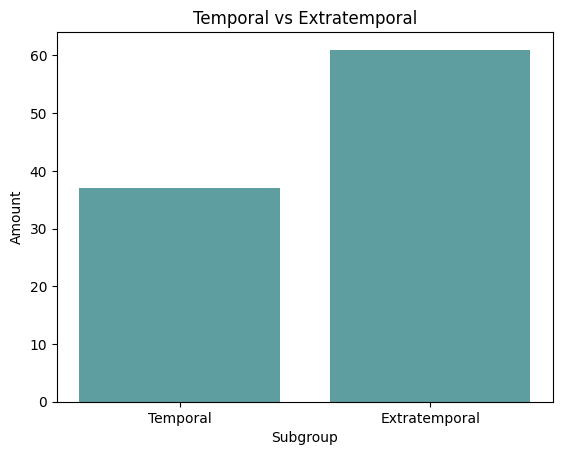

In [16]:
case = ['Temporal','Extratemporal']
value = [37, 61]

plt.bar(case,value,color='cadetblue')
plt.title('Temporal vs Extratemporal')
plt.xlabel('Subgroup')
plt.ylabel('Amount')
plt.show()

In [2]:
v1 = ['center','study_id','center_id','more_id','name','dob','dos','age','epilepsy_duration','sex','previous_resection_or_vns','seizure_onset_laterality','seizure_onset_lobe','mri_findings','lesion_number','fup_years','fup_months','seizure_change','seizure_reduction','response','BD_total_baseline','BD_total_1y_postop','BD_total_last_followup','side_effects','remarks_clinical','polarity_left','contacts_left','voltage_left','frequency_left','pulsewidth_left','polarity_right','contacts_right','voltage_right','frequency_right','pulsewidth_right','cycle','remarks_stimulationsettings']
v5 = ['center','lesion_id','study_id','center_id','more_id','name','dob','dos','age','epilepsy_duration','sex','previous_resection_or_vns','seizure_onset_laterality','seizure_onset_lobe','mri_findings','lesion_number','fup_years','fup_months','seizure_change','seizure_reduction','response','side_effects','remarks_clinical','polarity_left','contacts_left','voltage_left','frequency_left','pulsewidth_left','polarity_right','contacts_right','voltage_right','frequency_right','pulsewidth_right','cycle','remarks_stimulationsettings']
set1 = set(v1)
set5 = set(v5)

difference = set1.symmetric_difference(set5)

# Print the result
print("Values not in both lists:", difference)

Values not in both lists: {'BD_total_last_followup', 'BD_total_baseline', 'BD_total_1y_postop', 'lesion_id'}


# T-Tests and Chi Squares

In [45]:
#t-test on SANTE v MORE demographics
#revise values in columns
df['MORE_Gender'] = df['MORE_Gender'].replace('Male', 'M')
df['MORE_Gender'] = df['MORE_Gender'].replace('Female', 'F')
df['SANTE_Location'] = df['SANTE_Location'].replace('Temporal lobe ', 'Temporal')
df['SANTE_Location'] = df['SANTE_Location'].replace('Frontal lobe ', 'Frontal')
df['SANTE_Age'] = df['SANTE_Age'].str[1:3]
df['SANTE_YearswithEpilepsy'] = df['SANTE_YearswithEpilepsy'].str[1:3]
df['SANTE_PreviousVNS '] = df['SANTE_PreviousVNS '].replace('No ', 0)
df['SANTE_PreviousVNS '] = df['SANTE_PreviousVNS '].replace('Yes ', 1)
df['MORE_PreviousVNS '] = df['MORE_PreviousVNS '].replace('No', 0)
df['MORE_PreviousVNS '] = df['MORE_PreviousVNS '].replace('Yes', 1)
df['MORE_PreviousResection '] = df['MORE_PreviousResection '].replace('No', 0)
df['MORE_PreviousResection '] = df['MORE_PreviousResection '].replace('Yes', 1)
df['SANTE_PreviousResection '] = df['SANTE_PreviousResection '].replace('No ', 0)
df['SANTE_PreviousResection '] = df['SANTE_PreviousResection '].replace('Yes ', 1)
df['MORE_Gender'] = df['MORE_Gender'].replace('M', 0)
df['MORE_Gender'] = df['MORE_Gender'].replace('F', 1)
df['SANTE_Gender '] = df['SANTE_Gender '].replace('M ', 0)
df['SANTE_Gender '] = df['SANTE_Gender '].replace('F ', 1)

both_condition = (df['SANTE_PreviousResection '] == 1) & (df['SANTE_PreviousVNS '] == 1)
neither_condition = (df['SANTE_PreviousResection '] == 0) & (df['SANTE_PreviousVNS '] == 0)
df['SANTE_BothVNSRes'] = np.where(both_condition, 1, 0)
df['SANTE_NeitherVNSRes'] = np.where(neither_condition, 1, 0)

both_condition = (df['MORE_PreviousResection '] == 1) & (df['MORE_PreviousVNS '] == 1)
neither_condition = (df['MORE_PreviousResection '] == 0) & (df['MORE_PreviousVNS '] == 0)
df['MORE_BothVNSRes'] = np.where(both_condition, 1, 0)
df['MORE_NeitherVNSRes'] = np.where(neither_condition, 1, 0)

df['MORE_Temporal'] = df['MORE_Temporal'].replace('No', 0)
df['MORE_Temporal'] = df['MORE_Temporal'].replace('Yes', 1)
df['MORE_Frontal'] = df['MORE_Frontal'].replace('No', 0)
df['MORE_Frontal'] = df['MORE_Frontal'].replace('Yes', 2)
df['MORE_Other'] = df['MORE_Other'].replace('No', 0)
df['MORE_Other'] = df['MORE_Other'].replace('Yes', 3)

df['SANTE_Temporal'] = np.where(df['SANTE_Location'] == 'Temporal lobe ', 1, 0)
df['SANTE_Frontal'] = np.where(df['SANTE_Location'] == 'Frontal lobe ', 1, 0)
df['SANTE_Other'] = np.where((df['SANTE_Location'] == 'Other ') | (df['SANTE_Location'] == 'Occipital lobe ') | (df['SANTE_Location'] == 'Parietal lobe '), 1, 0)

In [102]:
#one sample t-test results
df = pd.read_csv('/Volumes/OneTouch/SANTE/CSV/SANTEvMORErev.csv')

age_t, age_p = stats.ttest_ind(df['MORE_Age'], df['SANTE_Age'])
gen_t, gen_p = stats.ttest_ind(df['MORE_Gender'], df['SANTE_Gender '])
ywe_t, ywe_p = stats.ttest_ind(df['SANTE_YearswithEpilepsy'], df['MORE_YearswithEpilepsy'])
vns_t, vns_p = stats.ttest_ind(df['SANTE_PreviousVNS '], df['MORE_PreviousVNS '])
res_t, res_p = stats.ttest_ind(df['SANTE_PreviousResection '], df['MORE_PreviousResection '])
bothvr_t, bothvr_p = stats.ttest_ind(df['SANTE_BothVNSRes'], df['MORE_BothVNSRes'])
novr_t, novr_p = stats.ttest_ind(df['SANTE_NeitherVNSRes'], df['MORE_NeitherVNSRes'])
temporal_t, temporal_p = stats.ttest_ind(df['SANTE_Temporal'], df['MORE_Temporal'])
frontal_t, frontal_p = stats.ttest_ind(df['SANTE_Frontal'], df['MORE_Frontal'])
other_t, other_p = stats.ttest_ind(df['SANTE_Other'], df['MORE_Other'])

print(f'Age T-statistic: {age_t}, Age P-value: {age_p}')
print(f'Gender T-statistic: {gen_t}, Gender P-value: {gen_p}')
print(f'YearswEpilepsy T-statistic: {ywe_t}, YearswEpilepsy P-value: {ywe_p}')
print(f'Previous VNS T-statistic: {vns_t}, Previous VNS P-value: {vns_p}')
print(f'Previous Resection T-statistic: {res_t}, Previous Resection P-value: {res_p}')
print(f'Both VNS and Resection T-statistic: {bothvr_t}, Both VNS and Resection P-value: {bothvr_p}')
print(f'Neither VNS nor Resection T-statistic: {novr_t}, Neither VNS nor Resection P-value: {novr_p}')
print(f'Temporal T-statistic: {temporal_t}, Temporal P-value: {temporal_p}')
print(f'Frontal T-statistic: {frontal_t}, Frontal P-value: {frontal_p}')
print(f'Other T-statistic: {other_t}, Other P-value: {other_p}')

Age T-statistic: 3.6218640087809018, Age P-value: 0.00040282820023203434
Gender T-statistic: -0.3277681120037531, Gender P-value: 0.7435565418891777
YearswEpilepsy T-statistic: -4.268360169781934, YearswEpilepsy P-value: 3.5265767857463596e-05
Previous VNS T-statistic: 0.656260974061917, Previous VNS P-value: 0.5126891854553205
Previous Resection T-statistic: 0.9637184135739951, Previous Resection P-value: 0.33678061790073055
Both VNS and Resection T-statistic: 2.753538495995115, Both VNS and Resection P-value: 0.006645012434662398
Neither VNS nor Resection T-statistic: 0.32971478457304, Neither VNS nor Resection P-value: 0.7420880553856165
Temporal T-statistic: 0.0, Temporal P-value: 1.0
Frontal T-statistic: -2.6842009773690267, Frontal P-value: 0.008110772533940547
Other T-statistic: -4.803815643511115, Other P-value: 3.821231801115587e-06


In [17]:
#chi squared results
df = pd.read_csv('/Volumes/OneTouch/SANTE/CSV/SANTEvMOREcategorical.csv')

gender_contingency_table = pd.crosstab(df['SANTE_Gender'], df['MORE_Gender'])
age_contingency_table = pd.crosstab(df['SANTE_Age'], df['MORE_Age'])
ywe_contingency_table = pd.crosstab(df['SANTE_YearswithEpilepsy'], df['MORE_YearswithEpilepsy'])
vns_contingency_table = pd.crosstab(df['SANTE_PreviousVNS'], df['MORE_PreviousVNS'])
res_contingency_table = pd.crosstab(df['SANTE_PreviousResection'], df['MORE_PreviousResection'])
both_contingency_table = pd.crosstab(df['SANTE_BothVNSRes'], df['MORE_BothVNSRes'])
nor_contingency_table = pd.crosstab(df['SANTE_NeitherVNSRes'], df['MORE_NeitherVNSRes'])
temp_contingency_table = pd.crosstab(df['SANTE_Temporal'], df['MORE_PreviousResection'])
frontal_contingency_table = pd.crosstab(df['SANTE_Frontal'], df['MORE_Frontal'])
other_contingency_table = pd.crosstab(df['SANTE_Other'], df['MORE_Other'])

gender_chi2, gender_p, gender_dof, gender_expected = chi2_contingency(gender_contingency_table)
age_chi2, age_p, age_dof, age_expected = chi2_contingency(age_contingency_table)
ywe_chi2, ywe_p, ywe_dof, ywe_expected = chi2_contingency(ywe_contingency_table)
vns_chi2, vns_p, vns_dof, vns_expected = chi2_contingency(vns_contingency_table)
res_chi2, res_p, res_dof, res_expected = chi2_contingency(res_contingency_table)
both_chi2, both_p, both_dof, both_expected = chi2_contingency(both_contingency_table)
other_chi2, other_p, other_dof, other_expected = chi2_contingency(other_contingency_table)
temp_chi2, temp_p, temp_dof, temp_expected = chi2_contingency(temp_contingency_table)
frontal_chi2, frontal_p, frontal_dof, frontal_expected = chi2_contingency(frontal_contingency_table)
nor_chi2, nor_p, nor_dof, nor_expected = chi2_contingency(nor_contingency_table)

print(f"Gender Chi-squared statistic: {gender_chi2}, Gender P-value: {gender_p}")
print(f"Age Chi-squared statistic: {age_chi2}, Age P-value: {age_p}")
print(f"Years with Epilepsy Chi-squared statistic: {ywe_chi2}, Years with Epilepsy P-value: {ywe_p}")
print(f"Previous VNS Chi-squared statistic: {vns_chi2}, Previous VNS P-value: {vns_p}")
print(f"Previous Resection Chi-squared statistic: {res_chi2}, Previous Resection P-value: {res_p}")
print(f"Both VNS and Resection Chi-squared statistic: {both_chi2}, Both VNS and Resection P-value: {both_p}")
print(f"Neither VNS nor Resection Chi-squared statistic: {nor_chi2}, Neither VNS nor Resection P-value: {nor_p}")
print(f"Temporal Chi-squared statistic: {temp_chi2}, Temporal P-value: {temp_p}")
print(f"Frontal Chi-squared statistic: {frontal_chi2}, Frontal P-value: {frontal_p}")
print(f"Other Chi-squared statistic: {other_chi2}, Other P-value: {other_p}")

Gender Chi-squared statistic: 0.26941946941946976, Gender P-value: 0.6037214631411393
Age Chi-squared statistic: 98.17544934640523, Age P-value: 0.6683160024867564
Years with Epilepsy Chi-squared statistic: 105.60021456804066, Years with Epilepsy P-value: 0.3837213109341884
Previous VNS Chi-squared statistic: 0.0010062047479810895, Previous VNS P-value: 0.9746947625992064
Previous Resection Chi-squared statistic: 0.13014647415777378, Previous Resection P-value: 0.718280217830757
Both VNS and Resection Chi-squared statistic: 0.0, Both VNS and Resection P-value: 1.0
Neither VNS nor Resection Chi-squared statistic: 0.00275026166267943, Neither VNS nor Resection P-value: 0.958175762225459
Temporal Chi-squared statistic: 0.6524510536710879, Temporal P-value: 0.4192377246749067
Frontal Chi-squared statistic: 0.006953975074953458, Frontal P-value: 0.9335410440839673
Other Chi-squared statistic: 0.7103171570193612, Other P-value: 0.39933854356039256


# Euclidean Distance

In [23]:
#euclidean distance of each patient to average xyz coordinates
df = pd.read_csv('/Volumes/Cingulate/Fred/MORE/CSV/MORE_Active_Coordinates.csv')
euclidean = []

def euclid(column_num):
    x1, y1, z1 = df.loc[column_num, ['Right_X', 'Right_Y', 'Right_Z']]
    x2, y2, z2 = df.loc[0, ['SANTE_Average_Right_X', 'SANTE_Average_Right_Y', 'SANTE_Average_Right_Z']]
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    euclidean.append(distance)
    return distance

for n in range(0,102):
    output = euclid(n)
    
new_df = pd.DataFrame(
    {'ID': df['ID'],
     'Euclidean_Distance': euclidean
    })

new_df.to_csv('/Volumes/Cingulate/Fred/MORE/CSV/rightMORE_Active_Coordinates.csv',index=False)

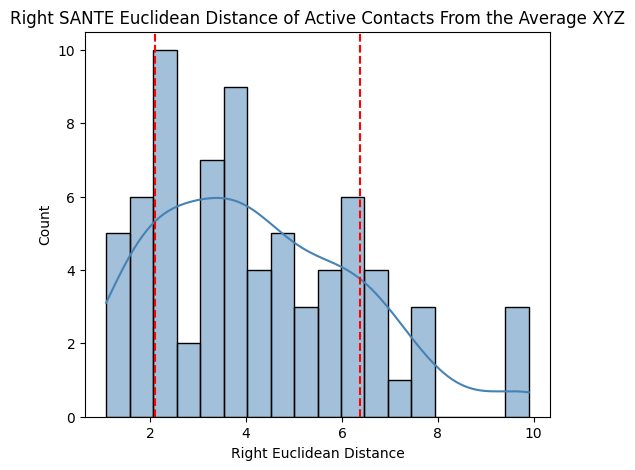

Outliers: sub-S01_contact1, sub-S04_contact1, sub-S06_contact1, sub-S07_contact1, sub-S10_contact1, sub-S14_contact1, sub-S17_contact1, sub-S18_contact1, sub-S22_contact1, sub-S25_contact1, sub-S26_contact1, sub-S27_contact1, sub-S28_contact1, sub-S29_contact1, sub-S39_contact1, sub-S40_contact1, sub-S45_contact1, sub-S47_contact1, sub-S48_contact1, sub-S50_contact1, sub-S52_contact1, sub-S65_contact1, sub-S66_contact1, sub-S67_contact1, sub-S71_contact1


In [3]:
#SANTE Histogram Average XYZ
df = pd.read_csv('/Volumes/Cingulate/Fred/SANTE/CSV/SANTE_Euclidean_Distance_Active_Coordinates.csv')

mean_distance = df['Euclidean_Distance_Right_Avg_XYZ'].mean()
std_distance = df['Euclidean_Distance_Right_Avg_XYZ'].std()

upper_limit = mean_distance + 1 * std_distance
lower_limit = mean_distance - 1 * std_distance

outliers = df[(df['Euclidean_Distance_Right_Avg_XYZ'] < lower_limit) | (df['Euclidean_Distance_Right_Avg_XYZ'] > upper_limit)]

plt.figure(figsize=(6, 5))
ax = sns.histplot(data=df, x="Euclidean_Distance_Right_Avg_XYZ", color='steelblue', binwidth=0.5,kde=True)

plt.axvline(upper_limit, color='red', linestyle='--', label=f'+1 SD ({upper_limit:.2f})')
plt.axvline(lower_limit, color='red', linestyle='--', label=f'-1 SD ({lower_limit:.2f})')

plt.title('Right SANTE Euclidean Distance of Active Contacts From the Average XYZ')
plt.xlabel('Right Euclidean Distance')
plt.ylabel('Count')

plt.show()

print('Outliers:',', '.join(outliers['Subject_Contact'].astype(str)))

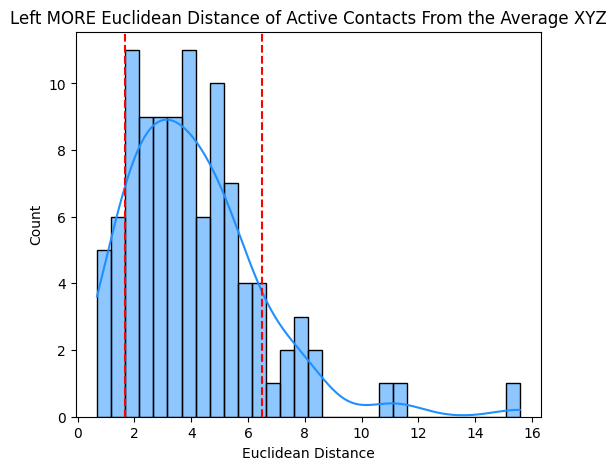

Outliers: sub-786412940, sub-786420, sub-78642000100101, sub-78672744, sub-79042010400101, sub-79042010400103, sub-79071154, sub-79071158, sub-791010473, sub-79111708, sub-79112012, sub-79132020200105, sub-7913618, sub-79142020100101, sub-791710499, sub-791710741, sub-791711010, sub-79172080100102, sub-79172080100104, sub-79172080100105, sub-79082040200111, sub-79102030300101


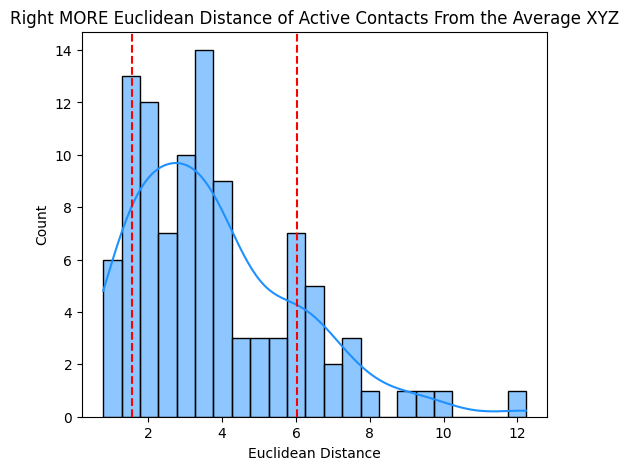

Outliers: sub-786412755, sub-786412940, sub-786413, sub-786416944, sub-786420, sub-78642000100103, sub-78642000100106, sub-78642000100107, sub-78642736, sub-7864357, sub-7864469, sub-786510474, sub-78652000200102, sub-786571, sub-79042903, sub-79053255, sub-79072040100101, sub-79082040200105, sub-791012186, sub-79111708, sub-79112012, sub-79123256, sub-7913619, sub-791710497, sub-791710499, sub-791710739, sub-791711060, sub-791717449, sub-79172080100102, sub-79172080100103, sub-79172080100105, sub-79082040200111, sub-79102030300101


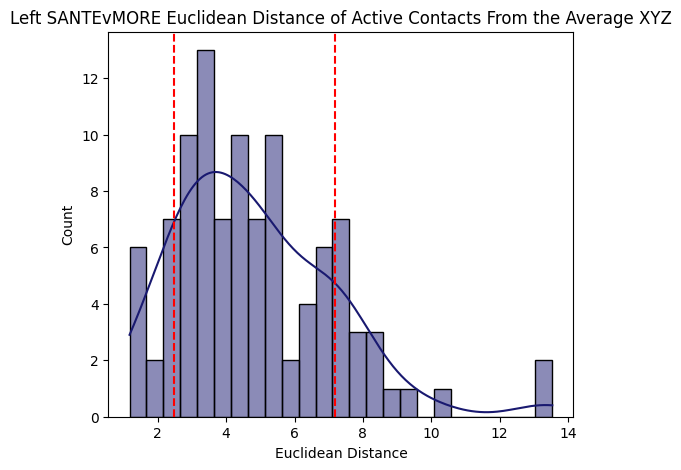

Outliers: sub-78641299, sub-786413, sub-786420, sub-78642000100102, sub-78642000100103, sub-78642000100104, sub-78642000100105, sub-78642000100106, sub-78652000200102, sub-786571, sub-7868256, sub-786840, sub-79042010400101, sub-79042010400102, sub-79052139, sub-79071158, sub-79073601, sub-79082040200107, sub-79082040200108, sub-79111708, sub-79112012, sub-79123256, sub-7913620, sub-79152110100102, sub-791710353, sub-791711056, sub-79172737, sub-791913213, sub-79082040200111, sub-79102030300101


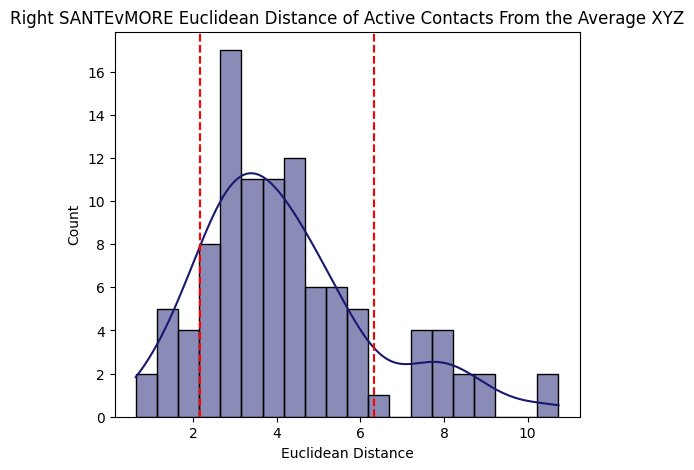

Outliers: sub-786412940, sub-786413, sub-786416944, sub-786420, sub-7864357, sub-786510474, sub-78652000200102, sub-786571, sub-790411969, sub-79042903, sub-79052010500101, sub-79071154, sub-79072040100101, sub-79082040200105, sub-79082040200107, sub-79111708, sub-79112012, sub-79123256, sub-791710499, sub-791711060, sub-791717449, sub-79172080100102, sub-79172737, sub-791913213, sub-79082040200111, sub-79102030300101


In [27]:
#MORE Histograms Average XYZ
df = pd.read_csv('/Volumes/Cingulate/Fred/MORE/CSV/MORE_Active_Coordinates.csv')

def histogram(column, color, title):
    mean_distance = df[column].mean()
    std_distance = df[column].std()
    upper_limit = mean_distance + 1 * std_distance
    lower_limit = mean_distance - 1 * std_distance
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    plt.figure(figsize=(6, 5))
    ax = sns.histplot(data=df, x=column, color=color,binwidth=0.5,kde=True)
    plt.axvline(upper_limit, color='red', linestyle='--', label=f'+1 SD ({upper_limit:.2f})')
    plt.axvline(lower_limit, color='red', linestyle='--', label=f'-1 SD ({lower_limit:.2f})')
    plt.title(f'{title} Euclidean Distance of Active Contacts From the Average XYZ')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Count')
    plt.show()
    print('Outliers:',', '.join(outliers['ID'].astype(str)))

histogram('MORE_Euclidean_Distance_Left_Avg_XYZ','dodgerblue','Left MORE')
histogram('MORE_Euclidean_Distance_Right_Avg_XYZ','dodgerblue','Right MORE')
histogram('SANTE2MORE_Euclidean_Distance_Left_Avg_XYZ','midnightblue','Left SANTEvMORE')
histogram('SANTE2MORE_Euclidean_Distance_Right_Avg_XYZ','midnightblue','Right SANTEvMORE')

In [35]:
#euclidean distance of each patient to average overall coordinates
df = pd.read_csv('/Volumes/Cingulate/Fred/MORE/CSV/MORE_Active_Coordinates.csv')
euclidean = []

def euclid(column_num):
    x1, y1, z1 = df.loc[column_num, ['Right_X', 'Right_Y', 'Right_Z']]
    x2,y2,z2 = df.loc[0, ['SANTE_Average_Right_Overall', 'SANTE_Average_Right_Overall', 'SANTE_Average_Right_Overall']]
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    euclidean.append(distance)
    return distance

for n in range(0,102):
    output = euclid(n)
    
new_df = pd.DataFrame(
    {'ID': df['ID'],
     'Euclidean_Distance_Right': euclidean
    })

new_df.to_csv('/Volumes/Cingulate/Fred/MORE/CSV/leftEuclidean_Distance_Coordinates_active.csv',index=False)

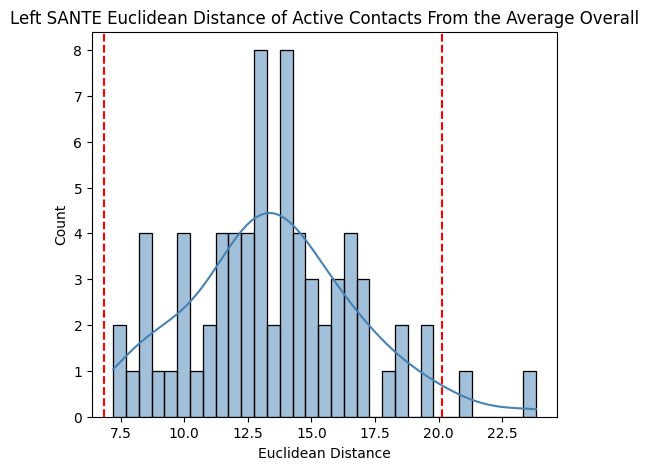

Outliers: sub-S28_contact1, sub-S29_contact1


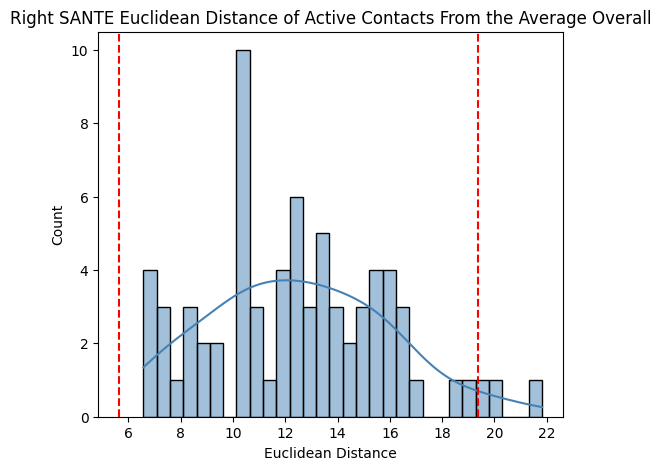

Outliers: sub-S28_contact1, sub-S62_contact1


In [39]:
#SANTE Histograms Average Overall
df = pd.read_csv('/Volumes/Cingulate/Fred/SANTE/CSV/SANTE_Euclidean_Distance_Active_Coordinates.csv')

def histogram(column, color, title):
    mean_distance = df[column].mean()
    std_distance = df[column].std()
    upper_limit = mean_distance + 2 * std_distance
    lower_limit = mean_distance - 2 * std_distance
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    plt.figure(figsize=(6, 5))
    ax = sns.histplot(data=df, x=column, color=color,binwidth=0.5,kde=True)
    plt.axvline(upper_limit, color='red', linestyle='--', label=f'+2 SD ({upper_limit:.2f})')
    plt.axvline(lower_limit, color='red', linestyle='--', label=f'-2 SD ({lower_limit:.2f})')
    plt.title(f'{title} Euclidean Distance of Active Contacts From the Average Overall')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Count')
    plt.show()
    print('Outliers:',', '.join(outliers['Subject_Contact'].astype(str)))

histogram('Euclidean_Distance_Left_Avg_Overall','steelblue','Left SANTE')
histogram('Euclidean_Distance_Right_Avg_Overall','steelblue','Right SANTE')

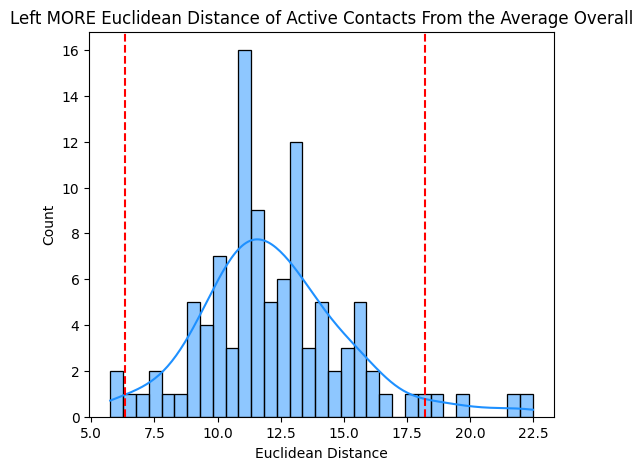

Outliers: sub-78652000200102, sub-79042010400101, sub-791010473, sub-79112012, sub-791710353, sub-791710741, sub-79102030300101


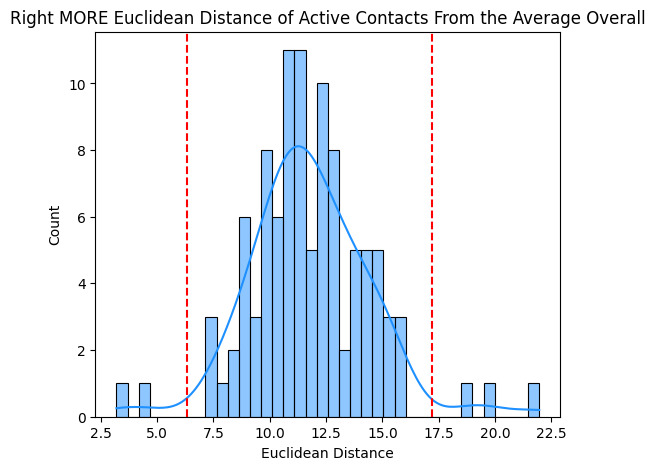

Outliers: sub-78652000200102, sub-79082040200105, sub-79112012, sub-791711060, sub-79102030300101


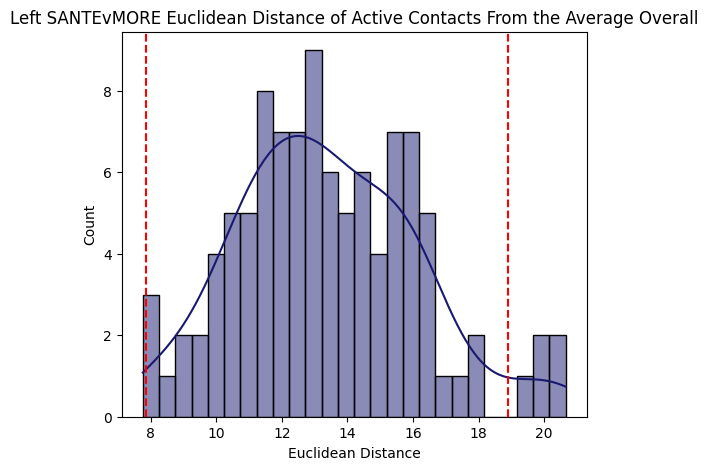

Outliers: sub-79042010400101, sub-79111708, sub-79112012, sub-791710353, sub-791710741, sub-79102030300101


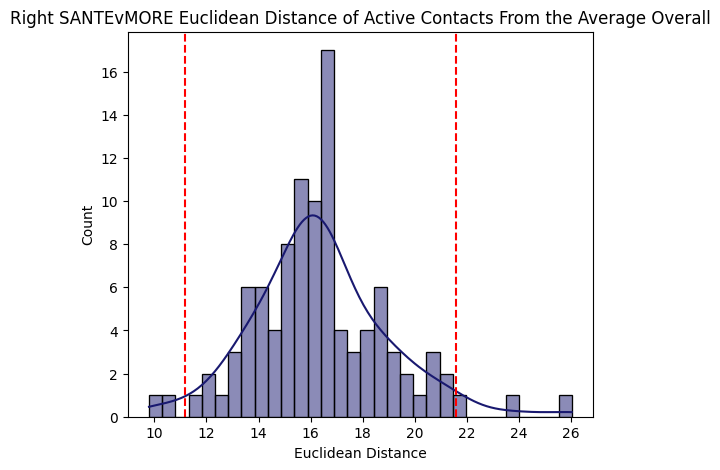

Outliers: sub-78652000200102, sub-79053255, sub-79072040100101, sub-79112012, sub-79102030300101


In [40]:
#MORE Histograms Average Overall
df = pd.read_csv('/Volumes/Cingulate/Fred/MORE/CSV/MORE_Active_Coordinates.csv')

def histogram(column, color, title):
    mean_distance = df[column].mean()
    std_distance = df[column].std()
    upper_limit = mean_distance + 2 * std_distance
    lower_limit = mean_distance - 2 * std_distance
    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    plt.figure(figsize=(6, 5))
    ax = sns.histplot(data=df, x=column, color=color,binwidth=0.5,kde=True)
    plt.axvline(upper_limit, color='red', linestyle='--', label=f'+2 SD ({upper_limit:.2f})')
    plt.axvline(lower_limit, color='red', linestyle='--', label=f'-2 SD ({lower_limit:.2f})')
    plt.title(f'{title} Euclidean Distance of Active Contacts From the Average Overall')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Count')
    plt.show()
    print('Outliers:',', '.join(outliers['ID'].astype(str)))

histogram('MORE_Euclidean_Distance_Left_Avg_Overall','dodgerblue','Left MORE')
histogram('MORE_Euclidean_Distance_Right_Avg_Overall','dodgerblue','Right MORE')
histogram('SANTE2MORE_Euclidean_Distance_Left_Avg_Overall','midnightblue','Left SANTEvMORE')
histogram('SANTE2MORE_Euclidean_Distance_Right_Avg_Overall','midnightblue','Right SANTEvMORE')